# Load packages

In [1]:
# Loading the required packages to run this notebook
from src.visualisation.SummaryModels import SummaryModels
import pandas as pd

# Look at the default setup
Use the VRNN model, 100 dimensional latent and recurrent laten space, and no batch normalization, scheduler, or KL annealing. Showing results for fishing, cargo and tanker vessels

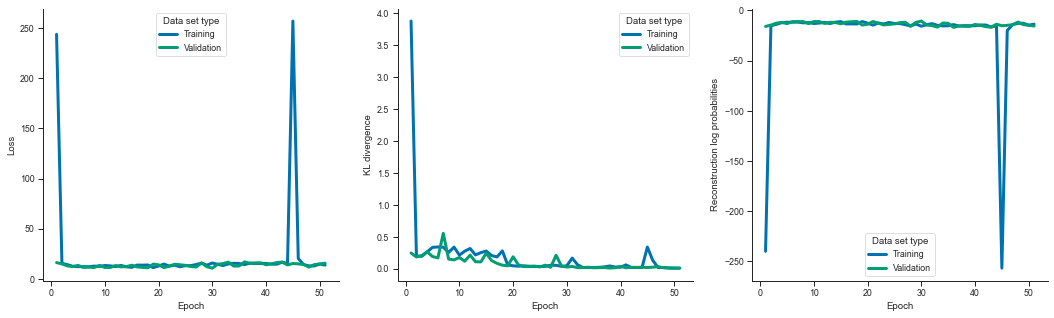

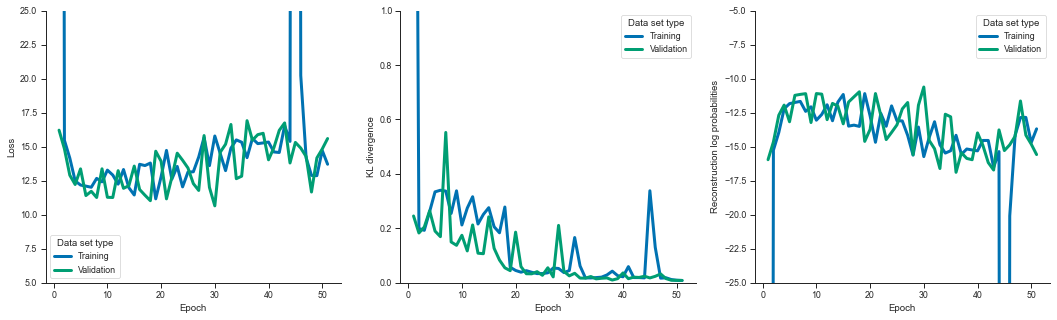

In [2]:
# Use the SummaryModels class
generative_dist = "Isotropic_Gaussian"
file_name = "RegionBornholm_01062019_30092019_FishCargTank_14400_86400_600"
summary_models = SummaryModels(file_name, generative_dist=generative_dist)
df_default = summary_models.load_curves_df("Default")
summary_models.plot_curves(df_default)
summary_models.plot_curves(df_default, ylims=[(5, 25), (0, 1), (-25, -5)])

#  Scheduler

VRNN_RegionBornholm_01062019_30092019_FishCargTank_14400_86400_600_latent100_recurrent100_batchNormFalse_Isotropic_Gaussian_SchedulerTrue


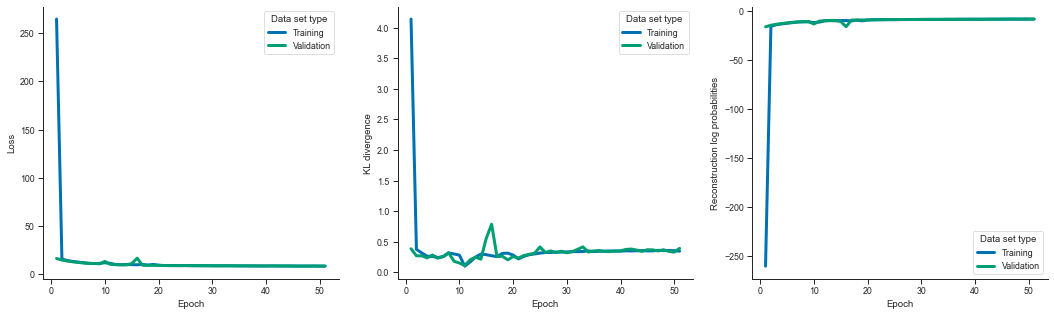

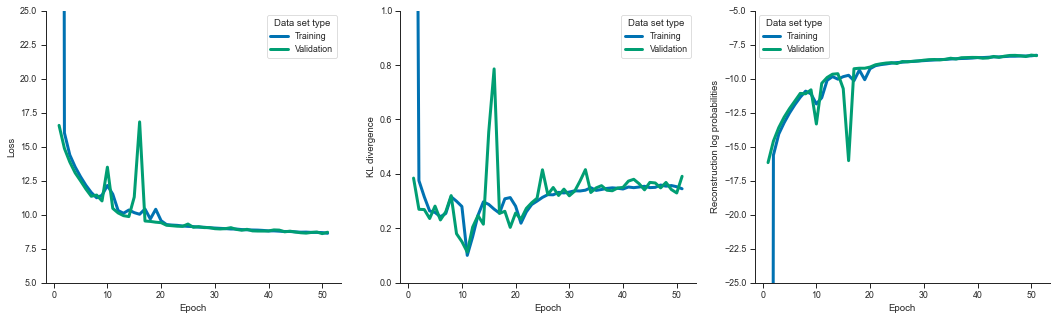

In [3]:
summary_models = SummaryModels(file_name, scheduler=True, generative_dist=generative_dist)
print(summary_models.model_name)
df_scheduler = summary_models.load_curves_df("Scheduler")
summary_models.plot_curves(df_scheduler)
summary_models.plot_curves(df_scheduler, ylims=[(5, 25), (0, 1), (-25, -5)])

# Learning Rate = 0.0001

VRNN_RegionBornholm_01062019_30092019_FishCargTank_14400_86400_600_latent100_recurrent100_batchNormFalse_Isotropic_Gaussian_lr00001


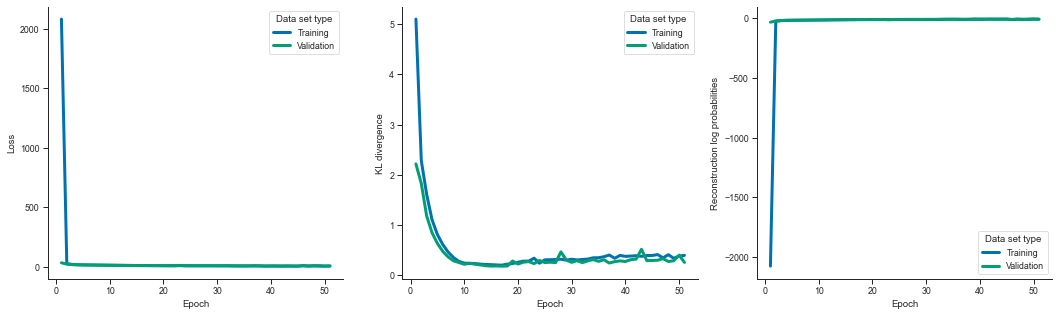

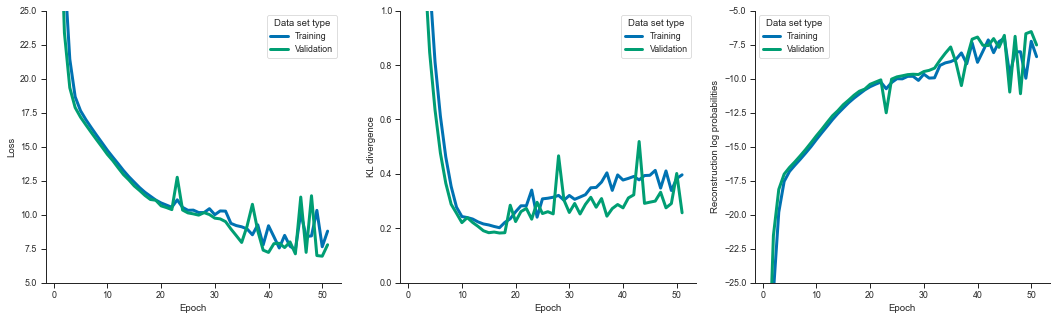

In [4]:
learning_rate = 0.0001
summary_models = SummaryModels(file_name, learning_rate=learning_rate, generative_dist=generative_dist)
print(summary_models.model_name)
df_lr_0_0001 = summary_models.load_curves_df("LR=0.0001")
summary_models.plot_curves(df_lr_0_0001)
summary_models.plot_curves(df_lr_0_0001, ylims=[(5, 25), (0, 1), (-25, -5)])

#  Annealed Kullback–Leibler 

In [5]:
#summary_models = SummaryModels(file_name, kl_annealing=True)
#df_annealing = summary_models.load_curves_df("Annealing")
#summary_models.plot_curves(df_annealing)

# Use batch normalization
Use the VRNN model, 100 dimensional latent and recurrent laten space, batch normalization, but no scheduler or KL annealing. Showing results for fishing, cargo and tanker vessels

In [6]:
#summary_models = SummaryModels(file_name, batch_norm=True)
#df_batch_norm = summary_models.load_curves_df("Batch_Norm")
#summary_models.plot_curves(df_batch_norm)

#  Batch normalization & Annealed Kullback–Leibler 

In [7]:
#summary_models = SummaryModels(file_name, batch_norm=True, kl_annealing=True)
#df_batch_norm_annealing = summary_models.load_curves_df("Batch_Norm_Annealing")
#summary_models.plot_curves(df_batch_norm_annealing)

# Compare the different model setups

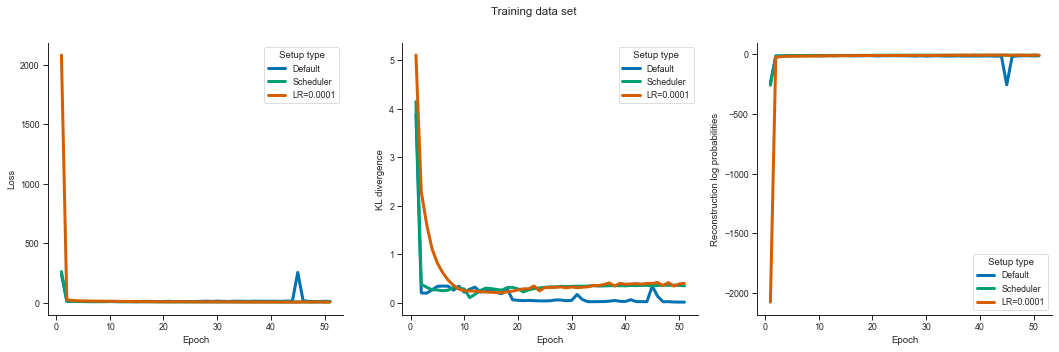

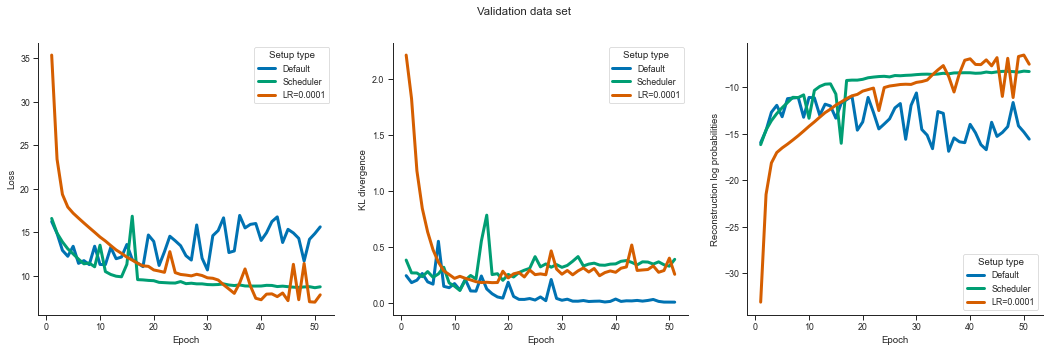

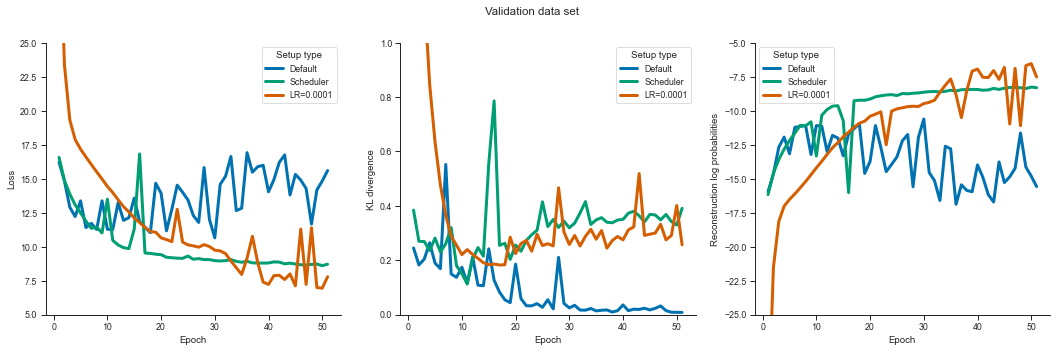

In [8]:
df = pd.concat([df_default, df_scheduler, df_lr_0_0001])
df.reset_index(drop=True, inplace=True)
hue = "Setup type"
hue_order = ["Default", "Scheduler", "LR=0.0001"]
summary_models.plot_curves(df[df["Data set type"] == "Training"], hue, hue_order, title="Training data set")
summary_models.plot_curves(df[df["Data set type"] == "Validation"], hue, hue_order, title="Validation data set")
summary_models.plot_curves(df[df["Data set type"] == "Validation"], hue, hue_order, title="Validation data set",
                           ylims=[(5, 25), (0, 1), (-25, -5)])

# Trajectory based reconstruction log probabilities
Plot histograms of the validation trajectory based reconstruction log probabilities (by ship type)

In [9]:
#summary_models = SummaryModels(file_name)
#data = summary_models.run_evaluation()["TrajectoryLevelData"]
#x = "Reconstruction log probability"
#hue = "Ship type"
#hue_order = ["Cargo", "Tanker", "Fishing"]

# Plot trajectory based reconstruction log probabilities
#summary_models.hist_stacked_plot(data, type="Histogram", x=x, hue=hue, hue_order=hue_order)
#summary_models.hist_stacked_plot(data, type="Stacked", x=x, hue=hue, hue_order=hue_order)
#summary_models.hist_stacked_plot(data, type="Stacked", x=x, hue=hue, hue_order=hue_order,
#                                 stat="normalized_each_bin", ylabel="Stacked bin percentages", print_summary_stats=True)

# Zoom in 
#summary_models.hist_stacked_plot(data, type="Histogram", x=x, hue=hue, hue_order=hue_order, xlim=[-1000, 0])
#summary_models.hist_stacked_plot(data, type="Stacked", x=x, hue=hue, hue_order=hue_order, 
#                                 xlim=[-1000, 0], print_summary_stats=True)

# Equally weighted (point based) reconstruction log probabilities
Divide the trajectory based reconstruction log probabilities by the corresponding trajectory length and plot the same histograms as above

In [10]:
#x = "Equally weighted reconstruction log probability"
#summary_models.hist_stacked_plot(data, type="Histogram", x=x, hue=hue, hue_order=hue_order)
#summary_models.hist_stacked_plot(data, type="Stacked", x=x, hue=hue, hue_order=hue_order)
#summary_models.hist_stacked_plot(data, type="Stacked", x=x, hue=hue, hue_order=hue_order,
#                                 stat="normalized_each_bin", ylabel="Stacked bin percentages", print_summary_stats=True)

# Zoom in 
#summary_models.hist_stacked_plot(data, type="Histogram", x=x, hue=hue, hue_order=hue_order, xlim=[-15, 0])
#summary_models.hist_stacked_plot(data, type="Stacked", x=x, hue=hue, hue_order=hue_order, 
#                                 xlim=[-15, 0], print_summary_stats=True)

In [11]:
# Look at some length statistics
# data.groupby("Ship type")["Length"].describe()